In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class InputDemand:
    def __init__(self, a1, a2, Q, P1):
        self.a1 = a1
        self.a2 = a2
        self.Q = Q
        self.P1 = P1

    def calculate_demand(self, P2):
        X1 = self.Q / self.a1
        X2 = self.Q / self.a2
        return X1, X2

    def calculate_demands(self, P2_range):
        return [(P2, *self.calculate_demand(P2)) for P2 in P2_range]

    def calculate_marginal_cost(self, P2):
        return self.a1*self.P1 + self.a2*P2

    def calculate_marginal_costs(self, P2_range):
        return [(P2, self.calculate_marginal_cost(P2)) for P2 in P2_range]

In [3]:
class ExpenditureShares:
    def __init__(self, P1, X1, X2):
        self.P1 = P1
        self.X1 = X1
        self.X2 = X2

    def calculate_shares(self, P2_range):
        shares = []
        for P2 in P2_range:
            total_cost = self.P1*self.X1 + P2*self.X2
            share_X1 = (self.P1*self.X1) / total_cost
            share_X2 = (P2*self.X2) / total_cost
            shares.append((P2, share_X1, share_X2))
        return shares

In [4]:
# Set price of capital, proportions and output level
P1 = 2
a1, a2 = 1, 1
Q = 10

# Create an instance of the InputDemand class
input_demand = InputDemand(a1, a2, Q, P1)

# Calculate the input demands and marginal costs as wages increase
P2_range = np.linspace(1, 10, 100)
demands = np.array(input_demand.calculate_demands(P2_range))
costs = np.array(input_demand.calculate_marginal_costs(P2_range))

# Create an instance of the ExpenditureShares class
expenditure_shares = ExpenditureShares(P1, Q / a1, Q / a2)

# Calculate expenditure shares as wages increase
shares = np.array(expenditure_shares.calculate_shares(P2_range))

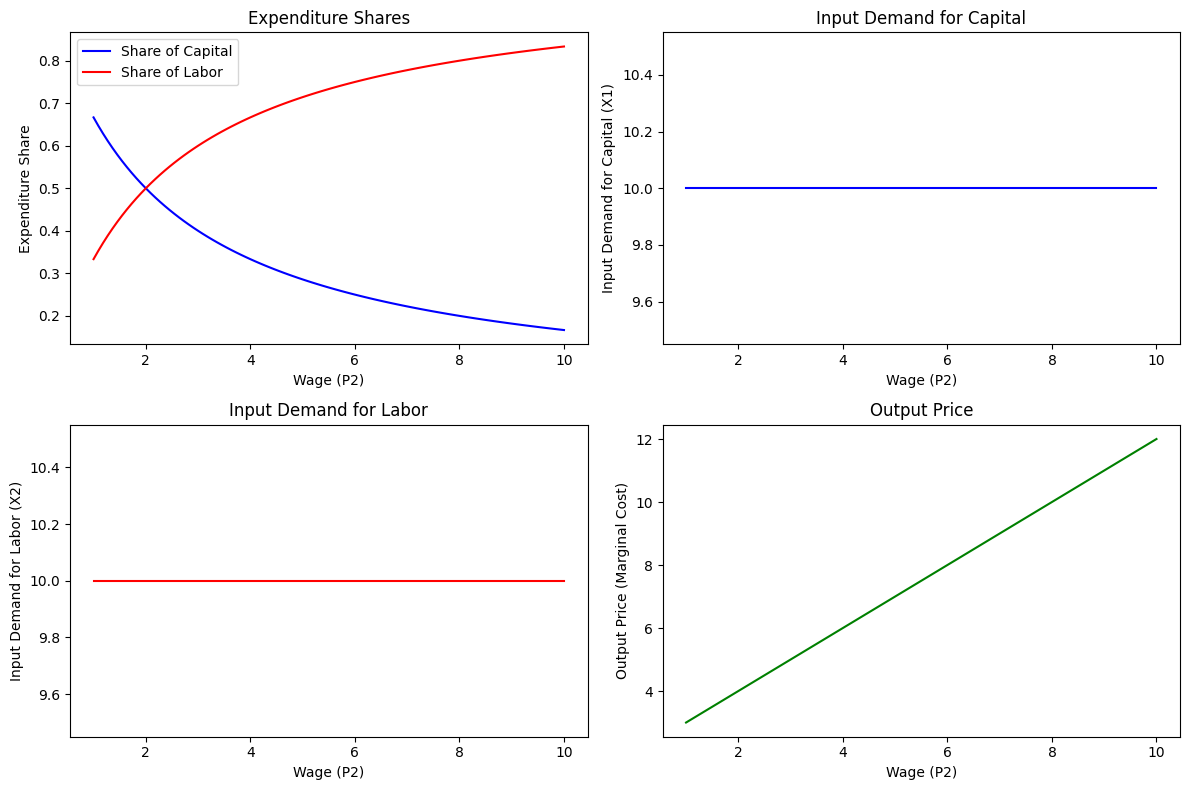

In [5]:
# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.plot(shares[:, 0], shares[:, 1], 'b-', label='Share of Capital')
plt.plot(shares[:, 0], shares[:, 2], 'r-', label='Share of Labor')
plt.xlabel('Wage (P2)')
plt.ylabel('Expenditure Share')
plt.title('Expenditure Shares')
plt.legend()

plt.subplot(222)
plt.plot(demands[:, 0], demands[:, 1], 'b-')
plt.xlabel('Wage (P2)')
plt.ylabel('Input Demand for Capital (X1)')
plt.title('Input Demand for Capital')

plt.subplot(223)
plt.plot(demands[:, 0], demands[:, 2], 'r-')
plt.xlabel('Wage (P2)')
plt.ylabel('Input Demand for Labor (X2)')
plt.title('Input Demand for Labor')

plt.subplot(224)
plt.plot(costs[:, 0], costs[:, 1], 'g-')
plt.xlabel('Wage (P2)')
plt.ylabel('Output Price (Marginal Cost)')
plt.title('Output Price')

plt.tight_layout()
plt.show()